## Functions from his code

In [ ]:
# importing the wisconsin cancer dataset

import sklearn.datasets

bunch = sklearn.datasets.load_breast_cancer(as_frame=True)
data = bunch['data']
target = bunch['target']

Eigenvalues of Hessian Matrix:[0.28876734 4.15138532]
[[4.10987496]
 [2.88425362]]
[[4.10987496]
 [2.88425362]]


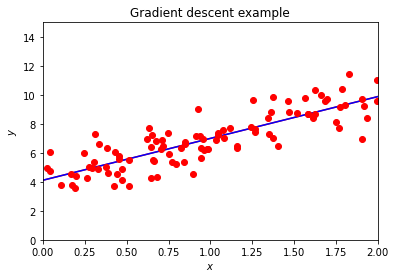

In [2]:
#gradient descent example

# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_linreg)
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 1000

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ beta-y)
    beta -= eta*gradient

print(beta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

Eigenvalues of Hessian Matrix:[0.27489565 4.42055128]
[[3.93670386]
 [3.06555738]]
[[3.93465652]
 [3.06728748]]


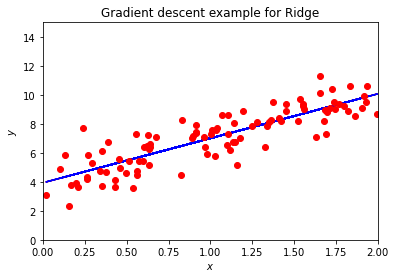

In [3]:
#gradient descent with ridge

from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X

#Ridge parameter lambda
lmbda  = 0.001
Id = n*lmbda* np.eye(XT_X.shape[0])

# Hessian matrix
H = (2.0/n)* XT_X+2*lmbda* np.eye(XT_X.shape[0])
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")


beta_linreg = np.linalg.inv(XT_X+Id) @ X.T @ y
print(beta_linreg)
# Start plain gradient descent
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 100

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ (X @ (beta)-y)+2*lmbda*beta
    beta -= eta*gradients

print(beta)
ypredict = X @ beta
ypredict2 = X @ beta_linreg
plt.plot(x, ypredict, "r-")
plt.plot(x, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example for Ridge')
plt.show()

>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


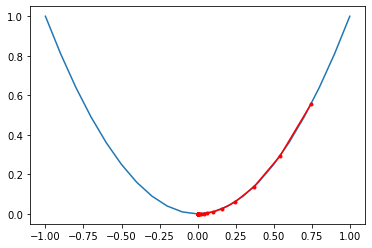

In [4]:
# gradient descent with momentum

from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

Own inversion
[[4.08805934]
 [2.86802426]]
Eigenvalues of Hessian Matrix:[0.26504701 4.42519896]
theta from own gd
[[4.08805934]
 [2.86802426]]
theta from own sdg
[[4.10653666]
 [2.86499207]]


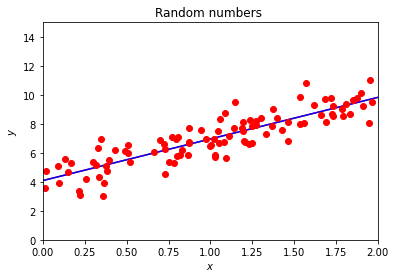

In [5]:
#code adding stochastic gradient descent

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

In [ ]:
# Using Autograd to calculate gradients using AdaGrad and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 10000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    # The outer product is calculated from scratch for each epoch
    Giter = np.zeros(shape=(3,3))
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Calculate the outer product of the gradients
        Giter +=gradients @ gradients.T
	# Simpler algorithm with only diagonal elements
        Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
        # compute update
        update = np.multiply(Ginverse,gradients)
        theta -= update
print("theta from own AdaGrad")
print(theta)

In [ ]:
# Using Autograd to calculate gradients using RMSprop and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 10000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameter rho
rho = 0.99
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = np.zeros(shape=(3,3))
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Previous value for the outer product of gradients
        Previous = Giter
	# Accumulated gradient
        Giter +=gradients @ gradients.T
	# Scaling with rho the new and the previous results
        Gnew = (rho*Previous+(1-rho)*Giter)
	# Taking the diagonal only and inverting
        Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
	# Hadamard product
        update = np.multiply(Ginverse,gradients)
        theta -= update
print("theta from own RMSprop")
print(theta)

In [ ]:
# to implement: SGD with ADAM!

In [ ]:
# for code in NeuralNetworks, see week 41

In [1]:
# logistic regression (?) from week 39

import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("Trained loss:", training_loss(weights))


Initial loss: 2.772588722239781
Trained loss: 1.067270675787016


## Our own code

In [102]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [9]:
# function that does gradient descent with fixed learning rate

def gradient_descent(X, y, eta, n_its):

    # initialize betas randomly
    beta = np.random.randn(np.shape(X)[1],1)

    for iter in range(n_its):
        gradient = X.T @ (X @ beta-y)
        beta -= eta*gradient

    return beta

In [3]:
# function that does gradient descent for OLS

def gradient_descent_linreg(X, y, n_its):

    # initialize betas randomly
    beta = np.random.randn(np.shape(X)[1],1)

    # compute the hessian
    H = X.T @ X
    EigValues, EigVectors = np.linalg.eig(H)
    eta = 1/np.max(EigValues)

    for iter in range(n_its):
        gradient = X.T @ (X @ beta-y)
        beta -= eta*gradient

    return beta

In [7]:
# function that does gradient descent for ridge

def gradient_descent_ridge(X, y, lam, n_its):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)

    # compute the hessian
    H = (X.T @ X) + 2 * lam * np.eye(X.shape[1])
    EigValues, EigVectors = np.linalg.eig(H)
    eta = 1/np.max(EigValues)

    for iter in range(n_its):
        gradient = X.T @ (X @ (beta)-y)+2*lam*beta
        beta -= eta*gradient

    return beta

In [17]:
# function that does gradient descent with momentum

def gradient_descent_with_momentum(X, y, eta, delta, n_its):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    change=0

    for iter in range(n_its):
        gradient = X.T @ (X @ (beta)-y)
        new_change = eta*gradient + delta*change
        beta -= new_change
        change = new_change
        gradient_before = gradient

    return beta

In [ ]:
def gradient_descent_with_adagrad(X, y, eta, delta, rho):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            Previous = Giter
            Giter += gradients @ gradients.T
            Gnew = (rho*Previous+(1-rho)*Giter)
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
            beta -= np.multiply(Ginverse,gradients)

    return beta

In [38]:
def stochastic_gradient_descent(X, y, eta, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):

        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            beta -= eta*gradients

    return beta

In [52]:
def stochastic_gradient_descent_with_adagrad(X, y, eta, delta, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            Giter += gradients @ gradients.T
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
            beta -= np.multiply(Ginverse,gradients)

    return beta

In [69]:
def stochastic_gradient_descent_with_rmsprop(X, y, eta, delta, rho, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            Previous = Giter
            Giter += gradients @ gradients.T
            Gnew = (rho*Previous+(1-rho)*Giter)
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
            beta -= np.multiply(Ginverse,gradients)

    return beta

In [91]:
def stochastic_gradient_descent_with_adam(X, y, eta, delta, rho1, rho2, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        previous = np.zeros(shape=(X.shape[1],1))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            gnew = (rho1*previous+(1-rho1)*gradients)
            previous = gnew
            Previous = Giter
            Giter += gradients @ gradients.T
            Gnew = (rho2*Previous+(1-rho2)*Giter)
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
            beta -= np.multiply(Ginverse,gnew)

    return beta

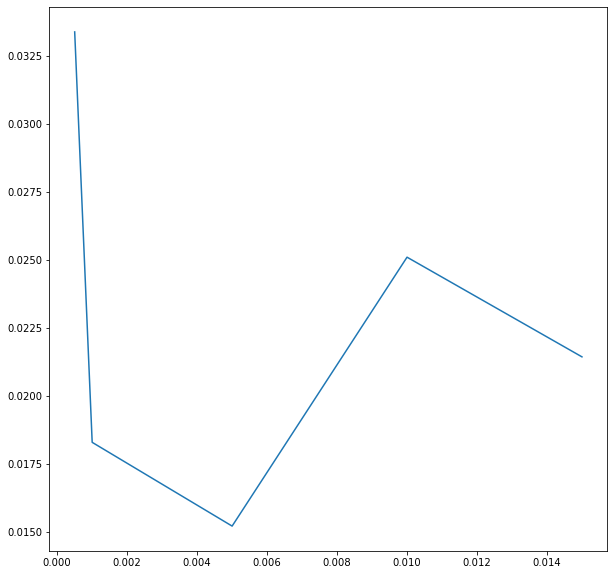

In [127]:
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its = 500
eta_list = [0.0005, 0.001, 0.005, 0.01, 0.015]
MSE_list = []

for eta in eta_list:
    betas = gradient_descent(Xtrain, ytrain, eta, n_its)
    ypred = Xtest @ betas
    MSE_list.append(mse(ytest,ypred))

fig = plt.figure(figsize = (10,10))
plt.plot(eta_list,MSE_list)

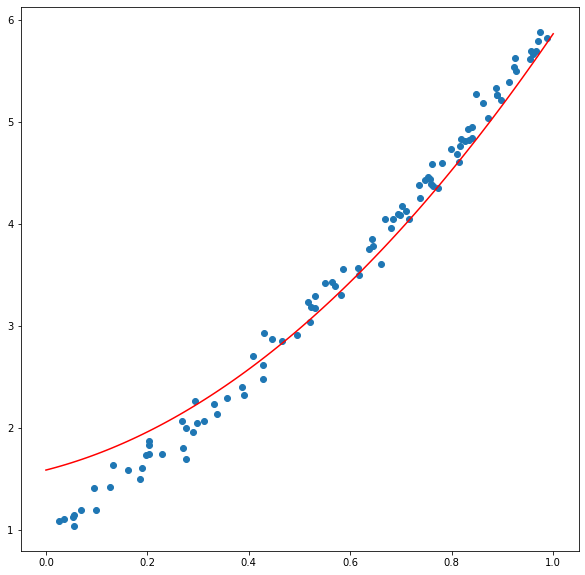

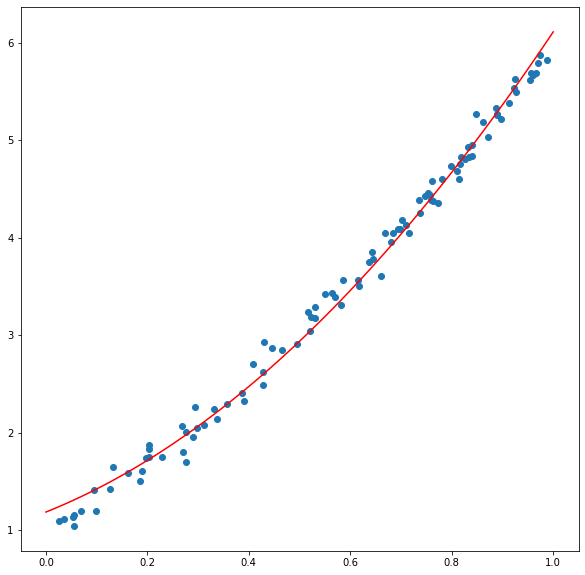

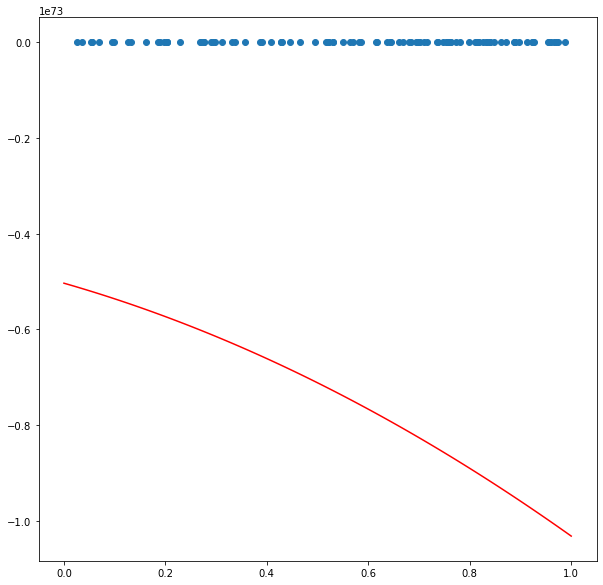

In [138]:
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

x_lins = np.linspace(0,1,100)


X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its = 500
eta_list = [0.0001, 0.005, 0.02]

for eta in eta_list:
    betas = gradient_descent(Xtrain, ytrain, eta, n_its)
    ypred = Xtest @ betas

    fig = plt.figure(figsize = (10,10))
    plt.scatter(x,y)
    plt.plot(x_lins, betas[0] + betas[1]*x_lins + betas[2]*x_lins**2, 'r')

(0.0, 0.08)

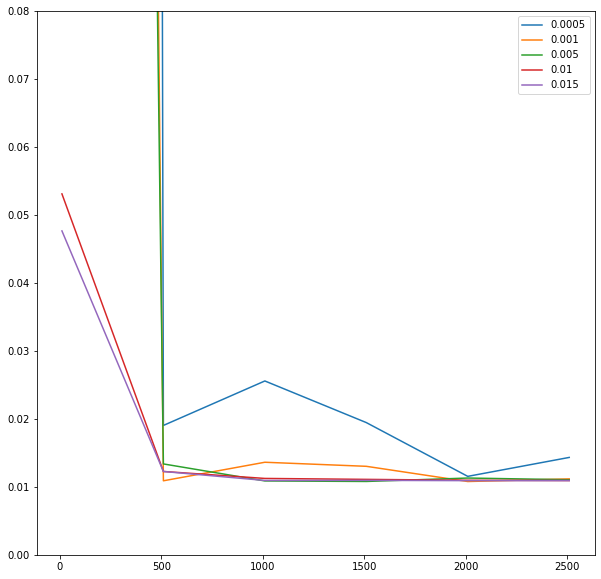

In [155]:
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

x_lins = np.linspace(0,1,100)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its_list = np.arange(10,3010,500)
eta_list = [0.0005, 0.001, 0.005, 0.01, 0.015]
MSE = np.zeros((len(n_its_list),len(eta_list)))

for i in range(len(n_its_list)):
    for j in range(len(eta_list)):
        
        n_its = n_its_list[i]
        eta = eta_list[j]

        betas = gradient_descent(Xtrain, ytrain, eta, n_its)
        ypred = Xtest @ betas
        MSE[i][j] = mse(ytest,ypred)

fig = plt.figure(figsize = (10,10))
for j in range(len(eta_list)):
    plt.plot(n_its_list,MSE[:,j], label = str(eta_list[j]))
plt.legend()
plt.ylim((0,0.08))

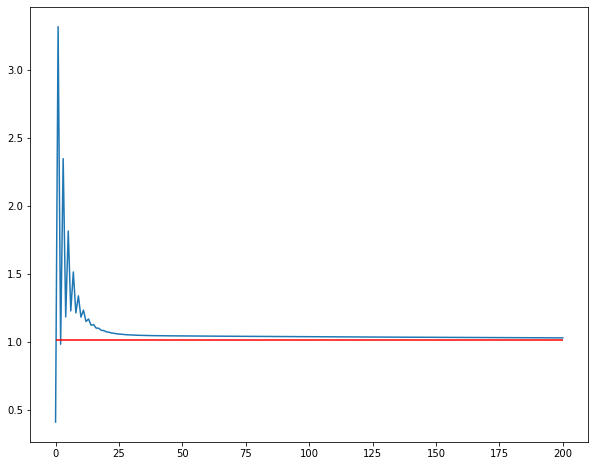

In [190]:
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)
n_its =  200

x_lins = np.linspace(0,1,100)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

OLSbetas = np.linalg.inv(Xtrain.T @ Xtrain) @ Xtrain.T @ ytrain

betas = np.zeros((np.shape(X)[1],n_its+1))



# initialize betas randomly
betas[:,0] = np.squeeze(np.random.randn(np.shape(X)[1],1))

for iter in range(n_its):
    gradient = Xtrain.T @ (Xtrain @ betas[:,iter]-ytrain.T).T
    betas[:,iter+1] = betas[:,iter] - eta*gradient.T

fig = plt.figure(figsize = (10,8))
plt.plot(range(n_its+1), betas[0,:])
plt.hlines(OLSbetas[0],0,200,'r')